## Solutions (DAY 2)

## General

**Give a brief description of the curse of dimensionality and its effects**

Curse of dimesionality refers to the effect of increasing the dimensionality of feature space has of supervised learning. A classifier’s performance increases as well until we reach the optimal number of features. Adding more features based on the same size as the training set will then degrade the classifier’s performance.

## Logistic Regression

In [2]:
def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [30]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [26]:
# Inspect the data set using a dataframe and fix missing data by deleting

In [31]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [66]:
# Remove missing data
pggm = pggm.dropna()

In [ ]:
# add a new column to pggm called sales_growth_class which is 1 if sales growth values is positive and -1 otherwise

In [67]:
pggm['sales_growth_class'] = np.where(pggm['5Y_Sales_Growth']>=0, 1, -1)

In [68]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,sales_growth_class
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,-1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


In [27]:
# Specify input features as Market_Cap_USD and price_USD columns and output feature as sales growth classes

In [76]:
X = pggm.iloc[:, [11,12]]
y = pggm.iloc[:, 18] 

In [ ]:
# Split the data into training/testing sets in a ratio of 70/30

In [77]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

In [ ]:
# Train the model using the training set

In [78]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [79]:
regressor.fit(X=np.array(X_train), y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Make predictions using the testing set

In [80]:
y_pred = regressor.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(regressor.predict(X_test), y_test.values.reshape(-1, 1)))

0.7761220196353437


In [ ]:
# plot outputs hint: use point_plot by copying the method from the logistic regression notebook

Text(0, 0.5, 'Price_USD')

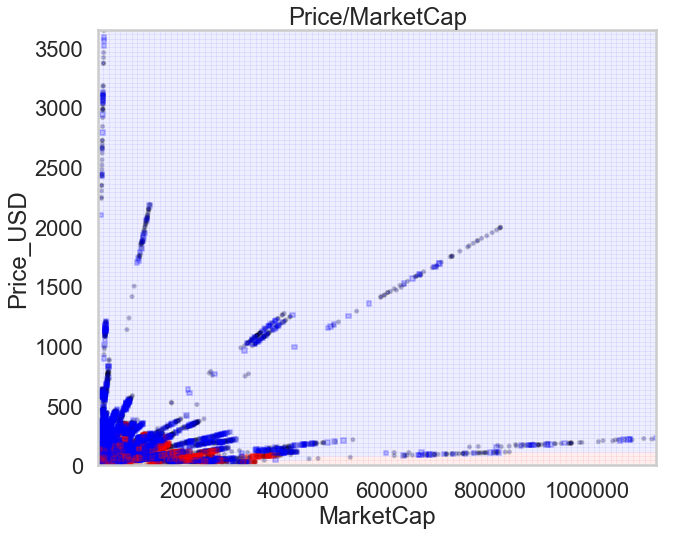

In [83]:
plt.figure(figsize=(10,8))
ax=plt.gca()
points_plot(ax, np.array(X_train), np.array(X_test), y_train, y_test, regressor, alpha=0.2);
plt.title('Price/MarketCap')
plt.xlabel('MarketCap')
plt.ylabel('Price_USD')

## Naive Bayesian

#### Methodology
<ol>
<li> split the data set into a training and test set in 80/20 ratio
<li> Use `scikit-learn`'s `MultinomialNB()` classifier with default parameters.
<li> train the classifier over the training set and test on the test set
<li> print the accuracy scores for both the training and the test sets
</ol>

What do you notice? Is this a good classifier? If not, why not?

In [10]:
# Implement a simple Naive Bayes classifier on pggm dataset using Universe_Returns_F1W and Price_USD as input and sales_growth_class as output like the logistic regression exercise.

In [4]:
import pandas as pd

In [5]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [6]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [7]:
# Remove missing data
pggm = pggm.dropna()

In [8]:
pggm['sales_growth_class'] = np.where(pggm['5Y_Sales_Growth']>=0, 1, -1)

In [9]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,sales_growth_class
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,-1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


In [13]:
X = pggm.iloc[:, [5,12]]
y = pggm.iloc[:, 18] 

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, y_pred)

array([[1089,  617],
       [3006, 2894]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.5236655272153563


In [21]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.5290927021696252


This is only as good as a random classifier approximately

## Support Vector Machine - Classification (SVM)

In [ ]:
# Given the (3) of types of kernels  and the previous model described in the notebook, 
# build & plot 3 new models using all the different kernels on pggm dataset and using Universe_Returns_F1W and Price_USD as input 
# and sales_growth_class as output like the logistic regression exercise 
# Which do you think is more suitable for our data ?
# Any other comments

In [1]:
import numpy as np

In [2]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [3]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [4]:
# Remove missing data
pggm = pggm.dropna()

In [5]:
pggm['sales_growth_class'] = np.where(pggm['5Y_Sales_Growth']>=0, 1, -1)

In [6]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,sales_growth_class
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,-1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


In [7]:
X = pggm.iloc[:, [5,12]]
y = pggm.iloc[:, 18] 

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, y_pred)

array([[   0, 1692],
       [   0, 5914]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.7775440441756508


In [15]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.773602892833662


In [ ]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[1089,  617],
       [3006, 2894]], dtype=int64)

In [20]:
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.5236655272153563


In [21]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.5290927021696252


In [16]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[   0, 1692],
       [   0, 5914]], dtype=int64)

In [19]:
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.7775440441756508


In [20]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.773602892833662
